# Chargement des librairies

In [1]:
!pip install nltk
!pip install imblearn
!pip install gensim
!pip install transformers

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.12.25-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (773 kB)
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)
  Using cached gensim-4.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Using cached smart_open-7.0.4-py3-none-any.whl (61 kB)
  Using cached transformers-4.39.3-py3-none-any.whl (8.8 MB)
  Using cached huggingface_hub-0.22.2-py3-none-any.whl (388 kB)
  Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Using cached safetensors-0.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)


In [196]:
import plotly
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import evaluate
from sklearn import linear_model, pipeline, feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight

# 1. Chargement des données

In [197]:
df = pd.read_csv("train.txt", sep='\t',header=None, names=['text'])
df['target'] = df['text'].apply(lambda x: x[1:4])
df['text'] = df['text'].apply(lambda x: x[5:])

In [198]:
df

,text,target
0,IThe importance and popularity of travelling ...,GER
1,"It is an important decision , how to plan you...",TUR
2,Some people believe that young people can enj...,CHI
3,Travelling is usually considered as good recr...,TEL
4,i agree that . Life is a person live period o...,ARA
...,...,...
9895,"Nowadays , more and more people go abroad , n...",CHI
9896,In accomplishing something that is risky come...,KOR
9897,"At the beginning of the 21st century , the in...",SPA
9898,The number of cars in use across the world ha...,HIN


In [199]:
#df_test = pd.read_csv("test.txt", sep='\t',header=None, names=['text'])

In [200]:
#df_test

In [201]:
# Tokenization and removing stop words
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    #text = re.sub('[^a-zA-Z0-9.]', ' ', text)
    #text = re.sub('( ){2,}',' ', text)
    return text

df["processed_text"] = df["text"].apply(preprocess_text)
#df_test["processed_text"] = df_test["text"].apply(preprocess_text)

In [202]:
df

,text,target,processed_text
0,IThe importance and popularity of travelling ...,GER,ithe importance and popularity of travelling ...
1,"It is an important decision , how to plan you...",TUR,"it is an important decision , how to plan you..."
2,Some people believe that young people can enj...,CHI,some people believe that young people can enj...
3,Travelling is usually considered as good recr...,TEL,travelling is usually considered as good recr...
4,i agree that . Life is a person live period o...,ARA,i agree that . life is a person live period o...
...,...,...,...
9895,"Nowadays , more and more people go abroad , n...",CHI,"nowadays , more and more people go abroad , n..."
9896,In accomplishing something that is risky come...,KOR,in accomplishing something that is risky come...
9897,"At the beginning of the 21st century , the in...",SPA,"at the beginning of the 21st century , the in..."
9898,The number of cars in use across the world ha...,HIN,the number of cars in use across the world ha...


In [203]:
#df_test

In [204]:
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe is named 'df' and the target column is named 'target'
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['target'])


# 2. Modèle Simple 

In [205]:
# Feature and Target
X = np.array(df["processed_text"])
y = np.array(df["target"])

In [206]:
vectorizer = TfidfVectorizer()
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fitting the vectorizer only on the training data
X_train1_vect = vectorizer.fit_transform(X_train1)

# Transforming both the training and test data using the fitted vectorizer
X_test1_vect = vectorizer.transform(X_test1)


In [207]:
unique_classes = np.unique(y_train1)

In [208]:
class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_train1)


In [209]:
# Fitting the vectorizer only on the training data
#X_train1_vect = vectorizer.fit_transform(df['processed_text'])

# Transforming both the training and test data using the fitted vectorizer
#X_test1_vect = vectorizer.transform(df_test['processed_text'])

In [210]:
#unique_classes = np.unique(df['target'])

In [211]:
#class_weights = compute_class_weight('balanced', classes=unique_classes, y=df['target'])

In [212]:
sgd_clf = SGDClassifier(class_weight=dict(zip(unique_classes, class_weights)), random_state=42,)
sgd_clf.fit(X_train1_vect, y_train1)

# Prédire les étiquettes sur les données de test
y_pred = sgd_clf.predict(X_test1_vect)

# Évaluer les performances
accuracy = accuracy_score(y_test1, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test1, y_pred))

Accuracy: 0.7424242424242424
Classification Report:
               precision    recall  f1-score   support

         ARA       0.70      0.69      0.70       180
         CHI       0.74      0.74      0.74       180
         FRE       0.79      0.77      0.78       180
         GER       0.79      0.89      0.84       180
         HIN       0.65      0.76      0.70       180
         ITA       0.85      0.84      0.85       180
         JPN       0.77      0.71      0.74       180
         KOR       0.69      0.64      0.66       180
         SPA       0.67      0.62      0.64       180
         TEL       0.81      0.69      0.75       180
         TUR       0.72      0.80      0.76       180

    accuracy                           0.74      1980
   macro avg       0.74      0.74      0.74      1980
weighted avg       0.74      0.74      0.74      1980



# 3. Hyperparameter Tuning

In [32]:
def best_hyperparameters(X_dev, y_dev):
     # Define the parameter grid to search
        param_grid = {
            'alpha': [0.0001, 0.001, 0.01, 0.1],
            'penalty': ['l1', 'l2'],
            'max_iter': [1000, 1500, 2000],
            'tol': [1e-3, 1e-4, 1e-5]
        }

        # Initialize the SGDClassifier
        sgd_classifier = SGDClassifier(random_state=42)

        # Initialize GridSearchCV
        grid_search = GridSearchCV(estimator=sgd_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

        # Perform grid search
        grid_search.fit(X_dev, y_dev)

        # Get the best hyperparameters
        best_params = grid_search.best_params_
        
        sgd_classifier = SGDClassifier(class_weight=dict(zip(unique_classes, class_weights)) , random_state=42 , alpha = best_params['alpha'], max_iter = best_params['max_iter'], penalty = best_params['penalty'], tol = best_params['tol'])
 
        
        
    
        return sgd_classifier

In [33]:
#model = best_hyperparameters(X_train1_vect, df['target'])

In [34]:
model = best_hyperparameters(X_train1_vect, y_train1)


KeyboardInterrupt



In [ ]:
model.fit(X_train1_vect, y_train1)

# Prédire les étiquettes sur les données de test
y_pred = sgd_clf.predict(X_test1_vect)

In [93]:
#y_pred_final = y_pred

In [96]:
#y_pred_final_df = pd.DataFrame(y_pred_final, columns=['pred'])


In [97]:
#y_pred_final_df

,pred
0,JPN
1,GER
2,FRE
3,FRE
4,ITA
...,...
1095,HIN
1096,JPN
1097,ARA
1098,KOR


In [100]:
#y_pred_final_df.to_csv('groupe05.csv', index=False)
#y_pred_final_df.to_csv('groupe05.txt',sep='\t', index=False)




In [62]:
sgd_clf = SGDClassifier(class_weight=dict(zip(unique_classes, class_weights)), random_state=42,)
sgd_clf.fit(X_train1_vect, y_train1)

# Prédire les étiquettes sur les données de test
y_pred = sgd_clf.predict(X_test1_vect)

# Évaluer les performances
accuracy = accuracy_score(y_test1, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test1, y_pred))

Accuracy: 0.7424242424242424
Classification Report:
               precision    recall  f1-score   support

         ARA       0.70      0.69      0.70       180
         CHI       0.74      0.74      0.74       180
         FRE       0.79      0.77      0.78       180
         GER       0.79      0.89      0.84       180
         HIN       0.65      0.76      0.70       180
         ITA       0.85      0.84      0.85       180
         JPN       0.77      0.71      0.74       180
         KOR       0.69      0.64      0.66       180
         SPA       0.67      0.62      0.64       180
         TEL       0.81      0.69      0.75       180
         TUR       0.72      0.80      0.76       180

    accuracy                           0.74      1980
   macro avg       0.74      0.74      0.74      1980
weighted avg       0.74      0.74      0.74      1980



In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
confusion_matrix = pd.crosstab(y_test1, y_pred_sgd, rownames=['Actual'], colnames=['Predicted'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SGDClassifier Predictions')
plt.show()

NameError: name 'y_pred_sgd' is not defined

# Création des groupe de langue:

In [213]:
language_families = {
    'HIN': 'India',
    'TEL': 'India',
    'JPN': 'Asia',
    'KOR': 'Asia',
    'CHI': 'Asia',
    'ARA' : 'ARA',
    'TUR' : 'TUR',
    'GER' : 'GER',
    'FRE' : 'EUROPE',
    'ITA' : 'EUROPE',
    'SPA' : 'EUROPE'
}

# Map the language codes to their families
df['family'] = df['target'].map(language_families)

In [214]:
df

,text,target,processed_text,target_encoded,family
0,IThe importance and popularity of travelling ...,GER,ithe importance and popularity of travelling ...,3,GER
1,"It is an important decision , how to plan you...",TUR,"it is an important decision , how to plan you...",10,TUR
2,Some people believe that young people can enj...,CHI,some people believe that young people can enj...,1,Asia
3,Travelling is usually considered as good recr...,TEL,travelling is usually considered as good recr...,9,India
4,i agree that . Life is a person live period o...,ARA,i agree that . life is a person live period o...,0,ARA
...,...,...,...,...,...
9895,"Nowadays , more and more people go abroad , n...",CHI,"nowadays , more and more people go abroad , n...",1,Asia
9896,In accomplishing something that is risky come...,KOR,in accomplishing something that is risky come...,7,Asia
9897,"At the beginning of the 21st century , the in...",SPA,"at the beginning of the 21st century , the in...",8,EUROPE
9898,The number of cars in use across the world ha...,HIN,the number of cars in use across the world ha...,4,India


# 4. 1er modèle pour prédire les groupes de langues

In [215]:
# Feature and Target
X = np.array(df["processed_text"])
y = np.array(df["family"])

In [216]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
# Fitting the vectorizer only on the training data
X_train2_vect = vectorizer.fit_transform(X_train2)

# Transforming both the training and test data using the fitted vectorizer
X_test2_vect = vectorizer.transform(X_test2)


In [218]:
unique_classes = np.unique(y_train2)

In [219]:
class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_train2)

In [220]:
classifier_sgd = SGDClassifier(random_state=42)

In [221]:
sgd_clf = SGDClassifier(class_weight=dict(zip(unique_classes, class_weights)), random_state=42,)
# Model Training - SGDClassifier
sgd_clf.fit(X_train2_vect, y_train2)



SGDClassifier(class_weight={'ARA': 1.8082191780821917,
                            'Asia': 0.617399438727783,
                            'EUROPE': 0.6148113646949231,
                            'GER': 1.8131868131868132,
                            'India': 0.9134948096885813,
                            'TUR': 1.8032786885245902},
              random_state=42)

In [222]:
# Make predictions
y_pred_2 = sgd_clf.predict(X_test2_vect)

# Evaluate the models
acc_sgd = accuracy_score(y_test2, y_pred_2)

print("\nSGDClassifier Performance:")
print("Accuracy:", accuracy_score(y_test2, y_pred_2))
print("Classification Report:\n", classification_report(y_test2, y_pred_2))





SGDClassifier Performance:
Accuracy: 0.8525252525252526
Classification Report:
               precision    recall  f1-score   support

         ARA       0.72      0.60      0.65       170
        Asia       0.89      0.90      0.89       562
      EUROPE       0.88      0.85      0.87       553
         GER       0.82      0.83      0.82       172
       India       0.86      0.96      0.91       355
         TUR       0.75      0.76      0.76       168

    accuracy                           0.85      1980
   macro avg       0.82      0.82      0.82      1980
weighted avg       0.85      0.85      0.85      1980



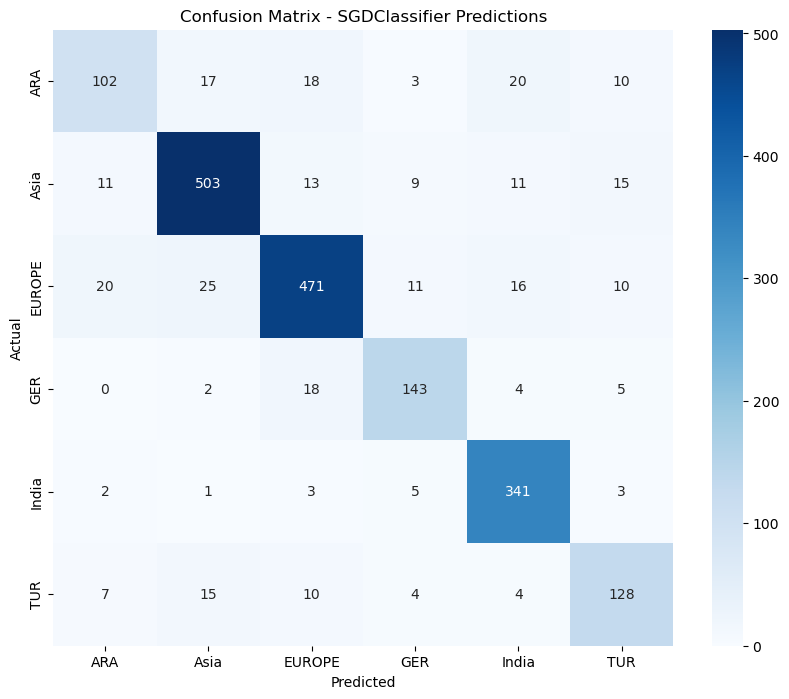

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
confusion_matrix = pd.crosstab(y_test2, y_pred_2, rownames=['Actual'], colnames=['Predicted'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SGDClassifier Predictions')
plt.show()

# 4. 2ème modèle pour prédire les langues de India

In [224]:
print(X_train1.shape)

(7920,)


# x train and y train

In [445]:
import pandas as pd


# Assuming X_train1 is a numpy array and y_train1 is a numpy array of target values
# Convert both to DataFrame if they are not already
X_train1_df = pd.DataFrame(X_train1, columns=['X_train1_feature'])  # Replace 'X_train1_feature' with appropriate column name
y_train1_df = pd.DataFrame(y_train1, columns=['target'])  # Assuming target is the name of your target column

target_values_to_keep = ['HIN', 'TEL']  # Replace 'value1' and 'value2' with the actual values you want to keep

# Map target values to 'other' if not in target_values_to_keep
y_train1_df['target'] = y_train1_df['target'].map(lambda x: x if x in target_values_to_keep else 'other')

# Concatenate X_train1_df and y_train1_df horizontally
df_with_target_india = pd.concat([X_train1_df, y_train1_df], axis=1)

# Now you have X_train1 values with corresponding target values in df_with_target DataFrame
df_with_target_india



,X_train1_feature,target
0,it is important to have an idea of many acade...,other
1,i agree that the most advertisement make prod...,other
2,is it more importent for students to understa...,other
3,"i will be honest , i never thought about such...",other
4,"through today 's environment situation , i re...",other
...,...,...
7915,i do n't agree that there will be less cars i...,other
7916,i believe that there would be more cars 20 ye...,HIN
7917,"when i see the commercials on television , i ...",other
7918,cars are the most convenient and usable trans...,other


In [226]:
y_pred_2

array(['TUR', 'EUROPE', 'EUROPE', ..., 'EUROPE', 'Asia', 'EUROPE'],
      dtype='<U6')

In [227]:
X_test2_df = pd.DataFrame(X_test2, columns=['X_test1']) 

In [228]:
X_test2_df

,X_test1
0,transportation is a very crucial dimension of...
1,i think that today is most important to speci...
2,"if we take a look around the world , we will ..."
3,"as a young person myself , to judge wheather ..."
4,the statement states the contribution of youn...
...,...
1975,"in the modern era , where it is an era of tec..."
1976,"one can undoubtedly say , that everybody in o..."
1977,"in our world , advertisements are maybe every..."
1978,when people travel our own country or the oth...


In [229]:
y_pred_2_df = pd.DataFrame(y_pred_2, columns=['y_pred_2']) 


In [230]:
y_pred_2_df

,y_pred_2
0,TUR
1,EUROPE
2,EUROPE
3,Asia
4,India
...,...
1975,India
1976,GER
1977,EUROPE
1978,Asia


In [231]:
df_with_prediction = pd.concat([X_test2_df, y_pred_2_df], axis=1)


In [232]:
df_with_prediction

,X_test1,y_pred_2
0,transportation is a very crucial dimension of...,TUR
1,i think that today is most important to speci...,EUROPE
2,"if we take a look around the world , we will ...",EUROPE
3,"as a young person myself , to judge wheather ...",Asia
4,the statement states the contribution of youn...,India
...,...,...
1975,"in the modern era , where it is an era of tec...",India
1976,"one can undoubtedly say , that everybody in o...",GER
1977,"in our world , advertisements are maybe every...",EUROPE
1978,when people travel our own country or the oth...,Asia


In [233]:
df_with_prediction_india = df_with_prediction[df_with_prediction['y_pred_2'] == 'India'] 

In [234]:
df_with_prediction_india

,X_test1,y_pred_2
4,the statement states the contribution of youn...,India
12,`` i'ts all youngone 's after god who can do ...,India
22,i do agree that there will be fewer cars twen...,India
23,twenty years from now the population of cars ...,India
28,youngsters are backbones of future and holdin...,India
...,...,...
1958,"yes , i agree to the statement . there are ma...",India
1967,should students pay more attention to underst...,India
1970,from my point of view this statement is only ...,India
1973,in todays modern time every things are develo...,India


# y test

In [235]:
merged_india = pd.merge(df_with_prediction_india, df, how='left', left_on='X_test1', right_on='processed_text')
merged_india.drop(columns=['X_test1','y_pred_2','text','family'], inplace=True)


In [236]:
merged_india.head(20)

,target,processed_text,target_encoded
0,HIN,the statement states the contribution of youn...,4
1,HIN,`` i'ts all youngone 's after god who can do ...,4
2,TEL,i do agree that there will be fewer cars twen...,9
3,HIN,twenty years from now the population of cars ...,4
4,TEL,youngsters are backbones of future and holdin...,9
5,TEL,`` young people nowadays do not give enough t...,9
6,HIN,i agree with the given statement that young p...,4
7,HIN,most of the people are happy with the knowled...,4
8,CHI,i agree that it is better to have a broad kno...,1
9,TEL,although some successful people prefer doing ...,9


In [237]:
target_values_to_keep = ['HIN', 'TEL']  # Replace 'value1' and 'value2' with the actual values you want to keep

# Map target values to 'other' if not in target_values_to_keep
merged_india['target'] = merged_india['target'].map(lambda x: x if x in target_values_to_keep else 'other')

In [238]:
merged_india.head(50)

,target,processed_text,target_encoded
0,HIN,the statement states the contribution of youn...,4
1,HIN,`` i'ts all youngone 's after god who can do ...,4
2,TEL,i do agree that there will be fewer cars twen...,9
3,HIN,twenty years from now the population of cars ...,4
4,TEL,youngsters are backbones of future and holdin...,9
5,TEL,`` young people nowadays do not give enough t...,9
6,HIN,i agree with the given statement that young p...,4
7,HIN,most of the people are happy with the knowled...,4
8,other,i agree that it is better to have a broad kno...,1
9,TEL,although some successful people prefer doing ...,9


In [239]:
# Fitting the vectorizer only on the training data
X_train3_vect = vectorizer.fit_transform(df_with_target_india['X_train1_feature'])

# Transforming both the training and test data using the fitted vectorizer
X_test3_vect = vectorizer.transform(df_with_prediction_india['X_test1'])


In [240]:
df_with_target_india.head(10)

,X_train1_feature,target
0,it is important to have an idea of many acade...,other
1,i agree that the most advertisement make prod...,other
2,is it more importent for students to understa...,other
3,"i will be honest , i never thought about such...",other
4,"through today 's environment situation , i re...",other
5,the issue at hand is young people enjoy life ...,other
6,i disagree with this statement that nowadays ...,other
7,when determining whether a person is successf...,other
8,school is a very important social structure w...,other
9,"in this writting , i am going to discuss an i...",other


In [241]:
# test for cross validation

In [242]:
df_with_prediction_india

,X_test1,y_pred_2
4,the statement states the contribution of youn...,India
12,`` i'ts all youngone 's after god who can do ...,India
22,i do agree that there will be fewer cars twen...,India
23,twenty years from now the population of cars ...,India
28,youngsters are backbones of future and holdin...,India
...,...,...
1958,"yes , i agree to the statement . there are ma...",India
1967,should students pay more attention to underst...,India
1970,from my point of view this statement is only ...,India
1973,in todays modern time every things are develo...,India


In [243]:
merged_india

,target,processed_text,target_encoded
0,HIN,the statement states the contribution of youn...,4
1,HIN,`` i'ts all youngone 's after god who can do ...,4
2,TEL,i do agree that there will be fewer cars twen...,9
3,HIN,twenty years from now the population of cars ...,4
4,TEL,youngsters are backbones of future and holdin...,9
...,...,...,...
391,TEL,"yes , i agree to the statement . there are ma...",9
392,HIN,should students pay more attention to underst...,4
393,other,from my point of view this statement is only ...,3
394,HIN,in todays modern time every things are develo...,4



SGDClassifier Performance with Balanced Data:
Accuracy: 0.9065656565656566
Classification Report:
               precision    recall  f1-score   support

         HIN       0.93      0.89      0.91       166
         TEL       0.96      0.89      0.93       175
       other       0.73      1.00      0.85        55

    accuracy                           0.91       396
   macro avg       0.88      0.93      0.89       396
weighted avg       0.92      0.91      0.91       396



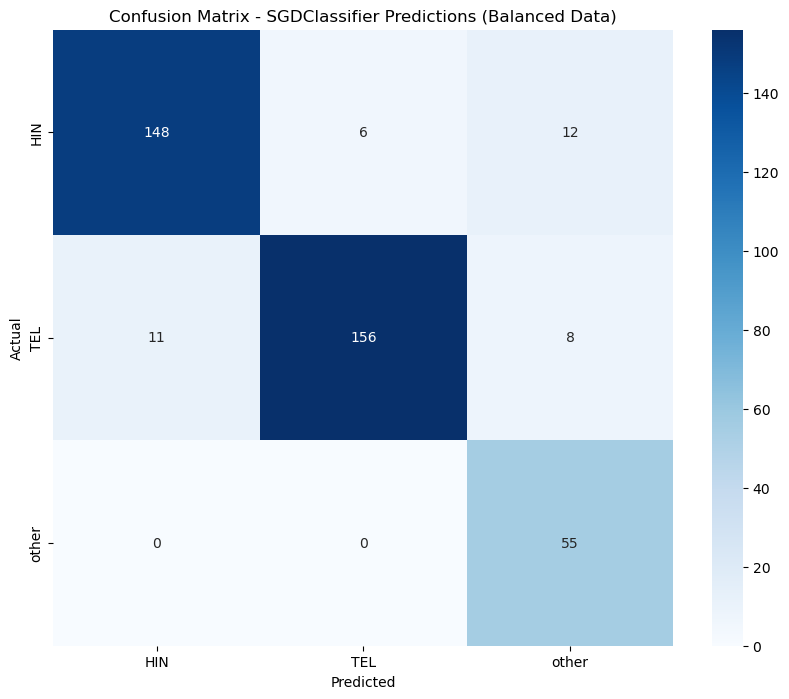

In [244]:
# Retrain your model using balanced data
classifier_sgd.fit(X_train3_vect, df_with_target_india['target'])

# Make predictions
y_pred_2 = classifier_sgd.predict(X_test3_vect)

# Evaluate the model
acc_sgd= accuracy_score(merged_india['target'], y_pred_2)
print("\nSGDClassifier Performance with Balanced Data:")
print("Accuracy:", acc_sgd)
print("Classification Report:\n", classification_report(merged_india['target'], y_pred_2))

# Visualize the confusion matrix
confusion_matrix_balanced = pd.crosstab(merged_india['target'], y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SGDClassifier Predictions (Balanced Data)')
plt.show()

In [245]:
df_with_prediction_india['y_pred'] = y_pred_2

/tmp/ipykernel_339/3942195510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_prediction_india['y_pred'] = y_pred_2


In [246]:
df_with_prediction_india

,X_test1,y_pred_2,y_pred
4,the statement states the contribution of youn...,India,HIN
12,`` i'ts all youngone 's after god who can do ...,India,HIN
22,i do agree that there will be fewer cars twen...,India,TEL
23,twenty years from now the population of cars ...,India,HIN
28,youngsters are backbones of future and holdin...,India,TEL
...,...,...,...
1958,"yes , i agree to the statement . there are ma...",India,TEL
1967,should students pay more attention to underst...,India,HIN
1970,from my point of view this statement is only ...,India,other
1973,in todays modern time every things are develo...,India,HIN


In [247]:
df_india_others = df_with_prediction_india[df_with_prediction_india['y_pred'] == 'other']

In [248]:
df_india_others

,X_test1,y_pred_2,y_pred
31,`` young people nowadays do not give enough t...,India,other
49,i agree that it is better to have a broad kno...,India,other
131,the statment shown uses a perspective which s...,India,other
144,i completley agree with the statment which sa...,India,other
162,i agree with the statement `` it is better to...,India,other
...,...,...,...
1793,yes . i think so it is not fine that it is be...,India,other
1868,"to answer that question , we need to ask anot...",India,other
1896,i agree with the statement that most advertis...,India,other
1937,"life is like a virgin forest , with primitive...",India,other


# EUR model

In [72]:
import pandas as pd

# Assuming X_train1 is a numpy array and y_train1 is a numpy array of target values
# Convert both to DataFrame if they are not already
X_train1_df = pd.DataFrame(X_train1, columns=['X_train1_feature'])  # Replace 'X_train1_feature' with appropriate column name
y_train1_df = pd.DataFrame(y_train1, columns=['target'])  # Assuming target is the name of your target column

target_values_to_keep = ['FRE', 'ITA','SPA' ]  # Replace 'value1' and 'value2' with the actual values you want to keep

# Map target values to 'other' if not in target_values_to_keep
y_train1_df['target'] = y_train1_df['target'].map(lambda x: x if x in target_values_to_keep else 'other')

# Concatenate X_train1_df and y_train1_df horizontally
df_with_target_eur = pd.concat([X_train1_df, y_train1_df], axis=1)

# Now you have X_train1 values with corresponding target values in df_with_target DataFrame
df_with_target_eur



,X_train1_feature,target
0,it is important to have an idea of many acade...,other
1,i agree that the most advertisement make prod...,other
2,is it more importent for students to understa...,other
3,"i will be honest , i never thought about such...",other
4,"through today 's environment situation , i re...",other
...,...,...
7915,i do n't agree that there will be less cars i...,other
7916,i believe that there would be more cars 20 ye...,other
7917,"when i see the commercials on television , i ...",other
7918,cars are the most convenient and usable trans...,other


In [73]:
df_with_prediction_europe = df_with_prediction[df_with_prediction['y_pred_2'] == 'EUROPE'] 

In [74]:
df_with_prediction_europe

,X_test1,y_pred_2
1,i think that today is most important to speci...,EUROPE
2,"if we take a look around the world , we will ...",EUROPE
8,"in my view , this statement is half-true . su...",EUROPE
14,when was signed the human right declaration ?...,EUROPE
19,broad knowledge vs . specialize what do you w...,EUROPE
...,...,...
1966,community ? who still helps his/her community...,EUROPE
1968,nowadays most students understand ideas and c...,EUROPE
1971,life is a short trip which is full of events ...,EUROPE
1977,"in our world , advertisements are maybe every...",EUROPE


In [75]:
merged_europe = pd.merge(df_with_prediction_europe, df, how='left', left_on='X_test1', right_on='processed_text')

# Replace target values other than 'HIN' and 'TUL' with 'other'
merged_europe['target'] = merged_europe['target'].apply(lambda x: x if x in ['FRE', 'ITA','SPA'] else 'other')

# Drop unnecessary columns
merged_europe.drop(columns=['X_test1','y_pred_2','text','family'], inplace=True)


In [76]:
merged_europe.head(10)

,target,processed_text,target_encoded
0,ITA,i think that today is most important to speci...,5
1,SPA,"if we take a look around the world , we will ...",8
2,FRE,"in my view , this statement is half-true . su...",2
3,FRE,when was signed the human right declaration ?...,2
4,SPA,broad knowledge vs . specialize what do you w...,8
5,ITA,i agree with the statement `` most advertisem...,5
6,other,knowledge is one of the most important things...,0
7,ITA,`` in twenty years there will befewer cars in...,5
8,FRE,how to be successful ? is it rather by only r...,2
9,ITA,"in my opinion , i think that for students it ...",5


In [77]:

# Fitting the vectorizer only on the training data
X_train3_vect = vectorizer.fit_transform(df_with_target_eur['X_train1_feature'])

# Transforming both the training and test data using the fitted vectorizer
X_test3_vect = vectorizer.transform(df_with_prediction_europe['X_test1'])



SGDClassifier Performance with Balanced Data:
Accuracy: 0.9118198874296435
Classification Report:
               precision    recall  f1-score   support

         FRE       0.97      0.93      0.95       168
         ITA       0.97      0.94      0.95       150
         SPA       0.97      0.87      0.92       153
       other       0.63      0.90      0.74        62

    accuracy                           0.91       533
   macro avg       0.88      0.91      0.89       533
weighted avg       0.93      0.91      0.92       533



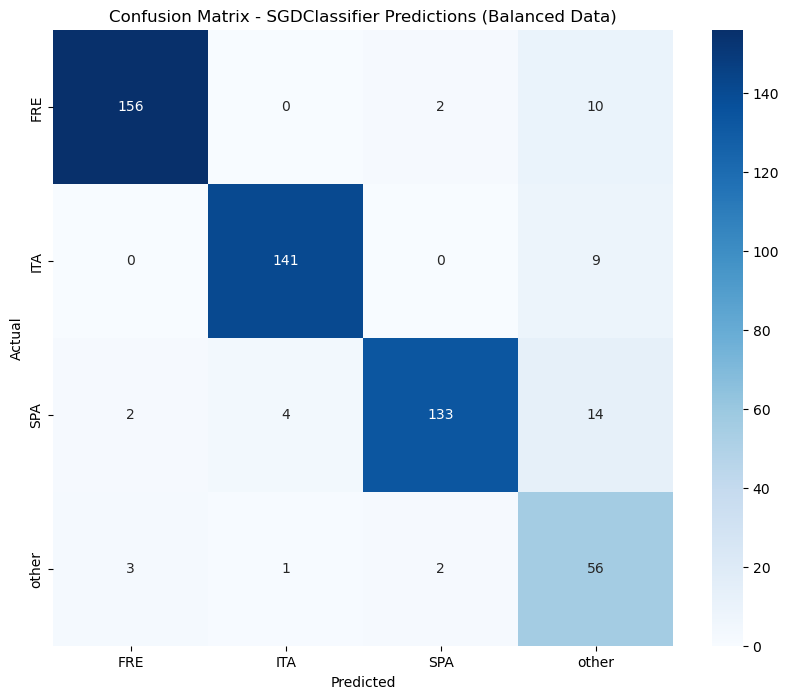

In [78]:
# Retrain your model using balanced data
classifier_sgd.fit(X_train3_vect, df_with_target_eur['target'])

# Make predictions
y_pred_2 = classifier_sgd.predict(X_test3_vect)

# Evaluate the model
acc_sgd= accuracy_score(merged_europe['target'], y_pred_2)
print("\nSGDClassifier Performance with Balanced Data:")
print("Accuracy:", acc_sgd)
print("Classification Report:\n", classification_report(merged_europe['target'], y_pred_2))

# Visualize the confusion matrix
confusion_matrix_balanced = pd.crosstab(merged_europe['target'], y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SGDClassifier Predictions (Balanced Data)')
plt.show()

In [79]:
df_with_prediction_europe

,X_test1,y_pred_2
1,i think that today is most important to speci...,EUROPE
2,"if we take a look around the world , we will ...",EUROPE
8,"in my view , this statement is half-true . su...",EUROPE
14,when was signed the human right declaration ?...,EUROPE
19,broad knowledge vs . specialize what do you w...,EUROPE
...,...,...
1966,community ? who still helps his/her community...,EUROPE
1968,nowadays most students understand ideas and c...,EUROPE
1971,life is a short trip which is full of events ...,EUROPE
1977,"in our world , advertisements are maybe every...",EUROPE


In [81]:
df_with_prediction_europe['y_pred'] = y_pred_2

/tmp/ipykernel_339/2808970320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_prediction_europe['y_pred'] = y_pred_2


In [82]:
df_with_prediction_europe

,X_test1,y_pred_2,y_pred
1,i think that today is most important to speci...,EUROPE,ITA
2,"if we take a look around the world , we will ...",EUROPE,SPA
8,"in my view , this statement is half-true . su...",EUROPE,FRE
14,when was signed the human right declaration ?...,EUROPE,FRE
19,broad knowledge vs . specialize what do you w...,EUROPE,SPA
...,...,...,...
1966,community ? who still helps his/her community...,EUROPE,FRE
1968,nowadays most students understand ideas and c...,EUROPE,FRE
1971,life is a short trip which is full of events ...,EUROPE,other
1977,"in our world , advertisements are maybe every...",EUROPE,ITA


In [83]:
df_eur_others = df_with_prediction_europe[df_with_prediction_europe['y_pred'] == 'other']

In [84]:
df_eur_others

,X_test1,y_pred_2,y_pred
25,knowledge is one of the most important things...,EUROPE,other
51,"it is better to have more academic subjects ,...",EUROPE,other
55,advertisors never tell the truth and nothing ...,EUROPE,other
75,successful people try new things and take ris...,EUROPE,other
98,"in modern statistic , 90 % of the public pref...",EUROPE,other
...,...,...,...
1923,"in my opinion , history is the most important...",EUROPE,other
1934,traveling is an oportunity for sharing with p...,EUROPE,other
1943,"ford , the genius who created the assembly li...",EUROPE,other
1962,from columbia roaming around the world in his...,EUROPE,other


# Asia model

In [85]:
import pandas as pd

# Assuming X_train1 is a numpy array and y_train1 is a numpy array of target values
# Convert both to DataFrame if they are not already
X_train1_df = pd.DataFrame(X_train1, columns=['X_train1_feature'])  # Replace 'X_train1_feature' with appropriate column name
y_train1_df = pd.DataFrame(y_train1, columns=['target'])  # Assuming target is the name of your target column

target_values_to_keep = ['JPN', 'KOR','CHI']  # Replace 'value1' and 'value2' with the actual values you want to keep

# Map target values to 'other' if not in target_values_to_keep
y_train1_df['target'] = y_train1_df['target'].map(lambda x: x if x in target_values_to_keep else 'other')

# Concatenate X_train1_df and y_train1_df horizontally
df_with_target_asia = pd.concat([X_train1_df, y_train1_df], axis=1)

# Now you have X_train1 values with corresponding target values in df_with_target DataFrame
df_with_target_asia.head(10)



,X_train1_feature,target
0,it is important to have an idea of many acade...,other
1,i agree that the most advertisement make prod...,other
2,is it more importent for students to understa...,other
3,"i will be honest , i never thought about such...",other
4,"through today 's environment situation , i re...",CHI
5,the issue at hand is young people enjoy life ...,other
6,i disagree with this statement that nowadays ...,CHI
7,when determining whether a person is successf...,JPN
8,school is a very important social structure w...,other
9,"in this writting , i am going to discuss an i...",other


In [86]:
df_with_prediction_asia = df_with_prediction[df_with_prediction['y_pred_2'] == 'Asia'] 

In [87]:
df_with_prediction_asia

,X_test1,y_pred_2
3,"as a young person myself , to judge wheather ...",Asia
6,it is important for everyone to have not only...,Asia
9,some people disagree with the ideas that in t...,Asia
10,i agree with that young people enjoy life mor...,Asia
11,young people enjoy life more than older peopl...,Asia
...,...,...
1960,i agree that young people nowadays do not giv...,Asia
1963,i do not agree with the statement that young ...,Asia
1964,"in my opinion , having broad knowledge of man...",Asia
1972,i disagree with the statement that the best w...,Asia


In [88]:
merged_asia = pd.merge(df_with_prediction_asia, df, how='left', left_on='X_test1', right_on='processed_text')
merged_asia.drop(columns=['X_test1','y_pred_2','text','family'], inplace=True)

target_values_to_keep = ['JPN', 'KOR','CHI']  # Replace 'value1' and 'value2' with the actual values you want to keep

# Map target values to 'other' if not in target_values_to_keep
merged_asia['target'] = merged_asia['target'].map(lambda x: x if x in target_values_to_keep else 'other')

In [89]:
merged_asia

,target,processed_text,target_encoded
0,KOR,"as a young person myself , to judge wheather ...",7
1,CHI,it is important for everyone to have not only...,1
2,JPN,some people disagree with the ideas that in t...,6
3,JPN,i agree with that young people enjoy life mor...,6
4,KOR,young people enjoy life more than older peopl...,7
...,...,...,...
558,JPN,i agree that young people nowadays do not giv...,6
559,CHI,i do not agree with the statement that young ...,1
560,KOR,"in my opinion , having broad knowledge of man...",7
561,CHI,i disagree with the statement that the best w...,1


In [90]:
# Fitting the vectorizer only on the training data
X_train3_vect = vectorizer.fit_transform(df_with_target_asia['X_train1_feature'])

# Transforming both the training and test data using the fitted vectorizer
X_test3_vect = vectorizer.transform(df_with_prediction_asia['X_test1'])



SGDClassifier Performance with Balanced Data:
Accuracy: 0.8756660746003553
Classification Report:
               precision    recall  f1-score   support

         CHI       0.96      0.90      0.93       152
         JPN       0.94      0.84      0.89       174
         KOR       0.97      0.86      0.92       177
       other       0.52      0.93      0.67        60

    accuracy                           0.88       563
   macro avg       0.85      0.89      0.85       563
weighted avg       0.91      0.88      0.89       563



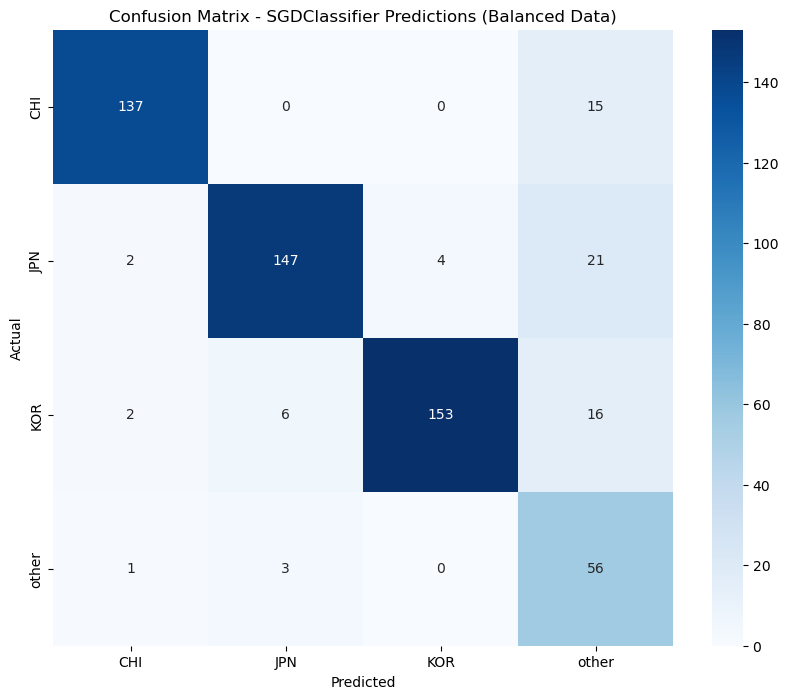

In [91]:
# Retrain your model using balanced data
classifier_sgd.fit(X_train3_vect, df_with_target_asia['target'])

# Make predictions
y_pred_2 = classifier_sgd.predict(X_test3_vect)

# Evaluate the model
acc_sgd= accuracy_score(merged_asia['target'], y_pred_2)
print("\nSGDClassifier Performance with Balanced Data:")
print("Accuracy:", acc_sgd)
print("Classification Report:\n", classification_report(merged_asia['target'], y_pred_2))

# Visualize the confusion matrix
confusion_matrix_balanced = pd.crosstab(merged_asia['target'], y_pred_2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SGDClassifier Predictions (Balanced Data)')
plt.show()

In [92]:
df_with_prediction_asia['y_pred'] = y_pred_2

/tmp/ipykernel_339/4178659929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_prediction_asia['y_pred'] = y_pred_2


In [93]:
df_with_prediction_asia

,X_test1,y_pred_2,y_pred
3,"as a young person myself , to judge wheather ...",Asia,KOR
6,it is important for everyone to have not only...,Asia,CHI
9,some people disagree with the ideas that in t...,Asia,JPN
10,i agree with that young people enjoy life mor...,Asia,JPN
11,young people enjoy life more than older peopl...,Asia,KOR
...,...,...,...
1960,i agree that young people nowadays do not giv...,Asia,JPN
1963,i do not agree with the statement that young ...,Asia,CHI
1964,"in my opinion , having broad knowledge of man...",Asia,KOR
1972,i disagree with the statement that the best w...,Asia,other


In [94]:
df_asia_others = df_with_prediction_asia[df_with_prediction_asia['y_pred'] == 'other']

In [95]:
df_asia_others

,X_test1,y_pred_2,y_pred
15,being bill gates success is an important thin...,Asia,other
16,i disagree that in twenty years there will be...,Asia,other
24,tring new things i agree that people they hav...,Asia,other
46,the question of wheter we should have general...,Asia,other
77,i am agree with this statement . young people...,Asia,other
...,...,...,...
1856,it is quite true that the advertisement compa...,Asia,other
1875,"the statement , `` it is more important for s...",Asia,other
1906,i agree with this statement . successful peop...,Asia,other
1920,there are a lot of successful people around w...,Asia,other


# Cross validation

In [97]:
from sklearn.preprocessing import LabelEncoder
df.drop(columns=['family','text'], inplace=True)




In [98]:
df

,target,processed_text,target_encoded
0,GER,ithe importance and popularity of travelling ...,3
1,TUR,"it is an important decision , how to plan you...",10
2,CHI,some people believe that young people can enj...,1
3,TEL,travelling is usually considered as good recr...,9
4,ARA,i agree that . life is a person live period o...,0
...,...,...,...
9895,CHI,"nowadays , more and more people go abroad , n...",1
9896,KOR,in accomplishing something that is risky come...,7
9897,SPA,"at the beginning of the 21st century , the in...",8
9898,HIN,the number of cars in use across the world ha...,4


In [99]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)


In [100]:
shuffled_df_vectorized = vectorizer.fit_transform(shuffled_df['processed_text'])


In [101]:
shuffled_df_vectorized

<9900x52220 sparse matrix of type '<class 'numpy.float64'>'
	with 1448004 stored elements in Compressed Sparse Row format>

In [102]:
len(shuffled_df['target_encoded'])

9900

In [103]:
shuffled_df_vectorized.shape[0]

9900

In [104]:
def best_hyperparameters(X_dev, y_dev):
     # Define the parameter grid to search
        param_grid = {
            'alpha': [0.0001, 0.001, 0.01, 0.1],
            'penalty': ['l1', 'l2'],
            'max_iter': [1000, 1500, 2000],
            'tol': [1e-3, 1e-4, 1e-5]
        }

        # Initialize the SGDClassifier
        sgd_classifier = SGDClassifier(random_state=42)

        # Initialize GridSearchCV
        grid_search = GridSearchCV(estimator=sgd_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

        # Perform grid search
        grid_search.fit(X_dev, y_dev)

        # Get the best hyperparameters
        best_params = grid_search.best_params_
        
        sgd_classifier = SGDClassifier(random_state=42 , alpha = best_params['alpha'], max_iter = best_params['max_iter'], penalty = best_params['penalty'], tol = best_params['tol'])
 
        
        
    
        return sgd_classifier

In [105]:
cv_predictions = [] 

In [106]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

def cross_validate_model(df_vectorized, model, n_splits=4):
    """
    Perform cross-validation on the given model and data.
    
    Parameters:
    X_df (pandas DataFrame): Feature data
    y_df (pandas DataFrame): Target data
    model (sklearn model): The machine learning model to be evaluated
    n_splits (int): Number of folds for cross-validation (default is 4)
    
    Returns:
    dict: A dictionary containing the mean accuracy score and the classification report
          across the cross-validation folds.
    """
    
    accuracy_scores = []
    classification_reports = []
    
    shape = df_vectorized.shape[0]
    
    length = len(df['target_encoded'])
    
    cpt = 0
    
    for i in range(n_splits):
        # Split the data into train, validation, and test sets
        
        X_test = df_vectorized[cpt : cpt + shape // 4 ]
        if i != 3 :
            X_dev = df_vectorized[cpt + (shape // 4) : cpt + (2 *  (shape // 4)) ]
            X_train = df_vectorized[[i for i in range(df_vectorized.shape[0]) if i < cpt or i >= cpt + (2 * (shape // 4))]]

        else:
            X_dev = df_vectorized[0: shape // 4]
            X_train = df_vectorized[[i for i in range(df_vectorized.shape[0]) if i >= cpt or i < shape // 4]]
      
    
    
    
        y_test = df['target_encoded'][cpt : cpt + shape // 4]
        if i != 3 :
            y_dev =  df['target_encoded'][cpt + (length // 4) : cpt + (2 *  (length // 4)) ]
            y_train =  df['target_encoded'][[i for i in range(length) if i < cpt or i >= cpt + (2 * (length // 4))]]

        else:
         
            y_dev = df['target_encoded'][0: length // 4]
            y_train = df['target_encoded'][[i for i in range(length) if i >= cpt or i < length // 4]]
    
            
            cpt = shape // 4
                    
        
        model = best_hyperparameters(X_dev, y_dev)

        
        
        # Train the model on the training set
        model.fit(X_train, y_train)
        
        # Evaluate the model on the validation set
        y_pred = model.predict(X_test)
        cv_predictions.append(y_pred)
        accuracy = accuracy_score(y_dev, y_pred)
        report = classification_report(y_dev, y_pred, output_dict=True)
        
        accuracy_scores.append(accuracy)
        classification_reports.append(report)
        
        
               
        print("\nSGDClassifier Performance:")
        print("Accuracy:", accuracy)
        print("Classification Report:\n", report)
        print(y_pred)

    
    ''' mean_accuracy = sum(accuracy_scores) / n_splits
    mean_classification_report = {
        k: sum(d[k] for d in classification_reports) / n_splits
        for k in classification_reports[0]
    }
    
    return {
        "mean_accuracy": mean_accuracy,
        "mean_classification_report": mean_classification_report
    }'''

In [107]:
model  = SGDClassifier()


In [108]:
cross_validate_model(shuffled_df_vectorized, model, n_splits=4)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic


SGDClassifier Performance:
Accuracy: 0.08121212121212121
Classification Report:
 {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 225}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 218}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 241}, '3': {'precision': 0.08121212121212121, 'recall': 1.0, 'f1-score': 0.15022421524663676, 'support': 201}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 219}, '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 244}, '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 217}, '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 222}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 217}, '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 248}, '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 223}, 'accuracy': 0.08121212121212121, 'macro avg': {'precision': 0.007382920110192837,

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic


SGDClassifier Performance:
Accuracy: 0.08121212121212121
Classification Report:
 {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 225}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 218}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 241}, '3': {'precision': 0.08121212121212121, 'recall': 1.0, 'f1-score': 0.15022421524663676, 'support': 201}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 219}, '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 244}, '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 217}, '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 222}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 217}, '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 248}, '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 223}, 'accuracy': 0.08121212121212121, 'macro avg': {'precision': 0.007382920110192837,

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic


SGDClassifier Performance:
Accuracy: 0.08121212121212121
Classification Report:
 {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 225}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 218}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 241}, '3': {'precision': 0.08121212121212121, 'recall': 1.0, 'f1-score': 0.15022421524663676, 'support': 201}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 219}, '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 244}, '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 217}, '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 222}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 217}, '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 248}, '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 223}, 'accuracy': 0.08121212121212121, 'macro avg': {'precision': 0.007382920110192837,

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



SGDClassifier Performance:
Accuracy: 0.08888888888888889
Classification Report:
 {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 215}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 225}, '2': {'precision': 0.09096209912536443, 'recall': 0.6695278969957081, 'f1-score': 0.1601642710472279, 'support': 233}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 214}, '4': {'precision': 0.0625, 'recall': 0.013392857142857142, 'f1-score': 0.022058823529411766, 'support': 224}, '5': {'precision': 0.08567415730337079, 'recall': 0.2785388127853881, 'f1-score': 0.1310418904403867, 'support': 219}, '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 231}, '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 244}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 238}, '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 209}, '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, '

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
flattened_cv_predictions = np.concatenate(cv_predictions)

In [110]:
df_cv_predictions = pd.DataFrame(flattened_cv_predictions, columns=['cross_validation'])

In [249]:
df_cv_predictions

,cross_validation
0,3
1,3
2,3
3,3
4,3
...,...
9895,5
9896,2
9897,4
9898,5


In [250]:
df_with_cross_validation = df.copy()

In [251]:
df_with_cross_validation['cross_validation'] = df_cv_predictions['cross_validation'] 

In [252]:
df_with_cross_validation

,text,target,processed_text,target_encoded,family,cross_validation
0,IThe importance and popularity of travelling ...,GER,ithe importance and popularity of travelling ...,3,GER,3
1,"It is an important decision , how to plan you...",TUR,"it is an important decision , how to plan you...",10,TUR,3
2,Some people believe that young people can enj...,CHI,some people believe that young people can enj...,1,Asia,3
3,Travelling is usually considered as good recr...,TEL,travelling is usually considered as good recr...,9,India,3
4,i agree that . Life is a person live period o...,ARA,i agree that . life is a person live period o...,0,ARA,3
...,...,...,...,...,...,...
9895,"Nowadays , more and more people go abroad , n...",CHI,"nowadays , more and more people go abroad , n...",1,Asia,5
9896,In accomplishing something that is risky come...,KOR,in accomplishing something that is risky come...,7,Asia,2
9897,"At the beginning of the 21st century , the in...",SPA,"at the beginning of the 21st century , the in...",8,EUROPE,4
9898,The number of cars in use across the world ha...,HIN,the number of cars in use across the world ha...,4,India,5


In [308]:
df_with_cross_validation_india = df_with_cross_validation.copy()

In [309]:
df_with_cross_validation_india

,text,target,processed_text,target_encoded,family,cross_validation
0,IThe importance and popularity of travelling ...,GER,ithe importance and popularity of travelling ...,3,GER,3
1,"It is an important decision , how to plan you...",TUR,"it is an important decision , how to plan you...",10,TUR,3
2,Some people believe that young people can enj...,CHI,some people believe that young people can enj...,1,Asia,3
3,Travelling is usually considered as good recr...,TEL,travelling is usually considered as good recr...,9,India,3
4,i agree that . Life is a person live period o...,ARA,i agree that . life is a person live period o...,0,ARA,3
...,...,...,...,...,...,...
9895,"Nowadays , more and more people go abroad , n...",CHI,"nowadays , more and more people go abroad , n...",1,Asia,5
9896,In accomplishing something that is risky come...,KOR,in accomplishing something that is risky come...,7,Asia,2
9897,"At the beginning of the 21st century , the in...",SPA,"at the beginning of the 21st century , the in...",8,EUROPE,4
9898,The number of cars in use across the world ha...,HIN,the number of cars in use across the world ha...,4,India,5


In [310]:
target_values_to_keep = ['HIN', 'TEL']  # Replace 'value1' and 'value2' with the actual values you want to keep

# Map target values to 'other' if not in target_values_to_keep
df_with_cross_validation_india= df_with_cross_validation_india[df_with_cross_validation_india['target'].isin(target_values_to_keep)]


In [311]:
df_with_cross_validation_india

,text,target,processed_text,target_encoded,family,cross_validation
3,Travelling is usually considered as good recr...,TEL,travelling is usually considered as good recr...,9,India,3
8,"In the era of science and technology , the pe...",HIN,"in the era of science and technology , the pe...",4,India,3
21,Yup ! i do agree with is statement that most ...,TEL,yup ! i do agree with is statement that most ...,9,India,3
26,I do agree with the satement that `` Young pe...,TEL,i do agree with the satement that `` young pe...,9,India,3
37,Everybody has its own point of view on a cert...,HIN,everybody has its own point of view on a cert...,4,India,3
...,...,...,...,...,...,...
9882,I agree with the opinion thjat young prople o...,HIN,i agree with the opinion thjat young prople o...,4,India,2
9886,yes i agree with the statemet given above . A...,TEL,yes i agree with the statemet given above . a...,9,India,5
9889,I support the argument that young people do n...,HIN,i support the argument that young people do n...,4,India,2
9890,This is a difficult topis as both travelling ...,HIN,this is a difficult topis as both travelling ...,4,India,2


In [312]:
rows_to_change = df_with_cross_validation_india['target_encoded'] != df_with_cross_validation_india['cross_validation']


In [313]:
df_with_cross_validation_india_others = df_with_cross_validation_india.copy()

In [314]:
df_with_cross_validation_india_others.loc[rows_to_change, 'target'] = 'other'


# Model Hindu with cross validation

In [446]:
df_with_cross_validation_india_others

,text,target,processed_text,target_encoded,family,cross_validation
3,Travelling is usually considered as good recr...,other,travelling is usually considered as good recr...,9,India,3
8,"In the era of science and technology , the pe...",other,"in the era of science and technology , the pe...",4,India,3
21,Yup ! i do agree with is statement that most ...,other,yup ! i do agree with is statement that most ...,9,India,3
26,I do agree with the satement that `` Young pe...,other,i do agree with the satement that `` young pe...,9,India,3
37,Everybody has its own point of view on a cert...,other,everybody has its own point of view on a cert...,4,India,3
...,...,...,...,...,...,...
9882,I agree with the opinion thjat young prople o...,other,i agree with the opinion thjat young prople o...,4,India,2
9886,yes i agree with the statemet given above . A...,other,yes i agree with the statemet given above . a...,9,India,5
9889,I support the argument that young people do n...,other,i support the argument that young people do n...,4,India,2
9890,This is a difficult topis as both travelling ...,other,this is a difficult topis as both travelling ...,4,India,2


In [447]:
df_with_target_india

,X_train1_feature,target
0,it is important to have an idea of many acade...,other
1,i agree that the most advertisement make prod...,other
2,is it more importent for students to understa...,other
3,"i will be honest , i never thought about such...",other
4,"through today 's environment situation , i re...",other
...,...,...
7915,i do n't agree that there will be less cars i...,other
7916,i believe that there would be more cars 20 ye...,HIN
7917,"when i see the commercials on television , i ...",other
7918,cars are the most convenient and usable trans...,other


In [448]:
df_with_prediction_india

,X_test1,y_pred_2,y_pred
4,the statement states the contribution of youn...,India,HIN
12,`` i'ts all youngone 's after god who can do ...,India,HIN
22,i do agree that there will be fewer cars twen...,India,TEL
23,twenty years from now the population of cars ...,India,HIN
28,youngsters are backbones of future and holdin...,India,TEL
...,...,...,...
1958,"yes , i agree to the statement . there are ma...",India,TEL
1967,should students pay more attention to underst...,India,HIN
1970,from my point of view this statement is only ...,India,other
1973,in todays modern time every things are develo...,India,HIN


In [449]:
df_with_target_india

,X_train1_feature,target
0,it is important to have an idea of many acade...,other
1,i agree that the most advertisement make prod...,other
2,is it more importent for students to understa...,other
3,"i will be honest , i never thought about such...",other
4,"through today 's environment situation , i re...",other
...,...,...
7915,i do n't agree that there will be less cars i...,other
7916,i believe that there would be more cars 20 ye...,HIN
7917,"when i see the commercials on television , i ...",other
7918,cars are the most convenient and usable trans...,other


In [450]:
# Fitting the vectorizer only on the training data
X_train3_vect = vectorizer.fit_transform(df_with_target_india['X_train1_feature'])

# Transforming both the training and test data using the fitted vectorizer
X_test3_vect = vectorizer.transform(df_with_prediction_india['X_test1'])


In [451]:
df_with_cross_validation

,text,target,processed_text,target_encoded,family,cross_validation
0,IThe importance and popularity of travelling ...,GER,ithe importance and popularity of travelling ...,3,GER,3
1,"It is an important decision , how to plan you...",TUR,"it is an important decision , how to plan you...",10,TUR,3
2,Some people believe that young people can enj...,CHI,some people believe that young people can enj...,1,Asia,3
3,Travelling is usually considered as good recr...,TEL,travelling is usually considered as good recr...,9,India,3
4,i agree that . Life is a person live period o...,ARA,i agree that . life is a person live period o...,0,ARA,3
...,...,...,...,...,...,...
9895,"Nowadays , more and more people go abroad , n...",CHI,"nowadays , more and more people go abroad , n...",1,Asia,5
9896,In accomplishing something that is risky come...,KOR,in accomplishing something that is risky come...,7,Asia,2
9897,"At the beginning of the 21st century , the in...",SPA,"at the beginning of the 21st century , the in...",8,EUROPE,4
9898,The number of cars in use across the world ha...,HIN,the number of cars in use across the world ha...,4,India,5


In [452]:
df_with_target_india

,X_train1_feature,target
0,it is important to have an idea of many acade...,other
1,i agree that the most advertisement make prod...,other
2,is it more importent for students to understa...,other
3,"i will be honest , i never thought about such...",other
4,"through today 's environment situation , i re...",other
...,...,...
7915,i do n't agree that there will be less cars i...,other
7916,i believe that there would be more cars 20 ye...,HIN
7917,"when i see the commercials on television , i ...",other
7918,cars are the most convenient and usable trans...,other


In [453]:
merged_india_cross_train = pd.merge(df_with_target_india, df_with_cross_validation, how='left', left_on='X_train1_feature', right_on='processed_text')
merged_india_cross_train.drop(columns=['target_x','processed_text'], inplace=True)


In [454]:
merged_india_cross_train

,X_train1_feature,text,target_y,target_encoded,family,cross_validation
0,it is important to have an idea of many acade...,It is important to have an idea of many acade...,ARA,0,ARA,3
1,i agree that the most advertisement make prod...,I agree that the most advertisement make prod...,TUR,10,TUR,3
2,is it more importent for students to understa...,Is it more importent for students to understa...,ARA,0,ARA,2
3,"i will be honest , i never thought about such...","I will be honest , I never thought about such...",GER,3,GER,3
4,"through today 's environment situation , i re...","Through today 's environment situation , I re...",CHI,1,Asia,3
...,...,...,...,...,...,...
7915,i do n't agree that there will be less cars i...,I do n't agree that there will be less cars i...,GER,3,GER,3
7916,i believe that there would be more cars 20 ye...,I believe that there would be more cars 20 ye...,HIN,4,India,3
7917,"when i see the commercials on television , i ...","When I see the commercials on television , I ...",KOR,7,Asia,3
7918,cars are the most convenient and usable trans...,Cars are the most convenient and usable trans...,TUR,10,TUR,3


In [455]:
merged_india_cross_train

,X_train1_feature,text,target_y,target_encoded,family,cross_validation
0,it is important to have an idea of many acade...,It is important to have an idea of many acade...,ARA,0,ARA,3
1,i agree that the most advertisement make prod...,I agree that the most advertisement make prod...,TUR,10,TUR,3
2,is it more importent for students to understa...,Is it more importent for students to understa...,ARA,0,ARA,2
3,"i will be honest , i never thought about such...","I will be honest , I never thought about such...",GER,3,GER,3
4,"through today 's environment situation , i re...","Through today 's environment situation , I re...",CHI,1,Asia,3
...,...,...,...,...,...,...
7915,i do n't agree that there will be less cars i...,I do n't agree that there will be less cars i...,GER,3,GER,3
7916,i believe that there would be more cars 20 ye...,I believe that there would be more cars 20 ye...,HIN,4,India,3
7917,"when i see the commercials on television , i ...","When I see the commercials on television , I ...",KOR,7,Asia,3
7918,cars are the most convenient and usable trans...,Cars are the most convenient and usable trans...,TUR,10,TUR,3


In [456]:
merged_india_cross_train

,X_train1_feature,text,target_y,target_encoded,family,cross_validation
0,it is important to have an idea of many acade...,It is important to have an idea of many acade...,ARA,0,ARA,3
1,i agree that the most advertisement make prod...,I agree that the most advertisement make prod...,TUR,10,TUR,3
2,is it more importent for students to understa...,Is it more importent for students to understa...,ARA,0,ARA,2
3,"i will be honest , i never thought about such...","I will be honest , I never thought about such...",GER,3,GER,3
4,"through today 's environment situation , i re...","Through today 's environment situation , I re...",CHI,1,Asia,3
...,...,...,...,...,...,...
7915,i do n't agree that there will be less cars i...,I do n't agree that there will be less cars i...,GER,3,GER,3
7916,i believe that there would be more cars 20 ye...,I believe that there would be more cars 20 ye...,HIN,4,India,3
7917,"when i see the commercials on television , i ...","When I see the commercials on television , I ...",KOR,7,Asia,3
7918,cars are the most convenient and usable trans...,Cars are the most convenient and usable trans...,TUR,10,TUR,3


In [457]:
rows_to_change = merged_india_cross_train['target_encoded'] != merged_india_cross_train['cross_validation']

In [458]:
merged_india_cross_train

,X_train1_feature,text,target_y,target_encoded,family,cross_validation
0,it is important to have an idea of many acade...,It is important to have an idea of many acade...,ARA,0,ARA,3
1,i agree that the most advertisement make prod...,I agree that the most advertisement make prod...,TUR,10,TUR,3
2,is it more importent for students to understa...,Is it more importent for students to understa...,ARA,0,ARA,2
3,"i will be honest , i never thought about such...","I will be honest , I never thought about such...",GER,3,GER,3
4,"through today 's environment situation , i re...","Through today 's environment situation , I re...",CHI,1,Asia,3
...,...,...,...,...,...,...
7915,i do n't agree that there will be less cars i...,I do n't agree that there will be less cars i...,GER,3,GER,3
7916,i believe that there would be more cars 20 ye...,I believe that there would be more cars 20 ye...,HIN,4,India,3
7917,"when i see the commercials on television , i ...","When I see the commercials on television , I ...",KOR,7,Asia,3
7918,cars are the most convenient and usable trans...,Cars are the most convenient and usable trans...,TUR,10,TUR,3


In [459]:
merged_india_cross_train.loc[rows_to_change, 'target_y'] = 'other'


In [460]:
merged_india_cross_train.drop(columns=['target_encoded','cross_validation'], inplace=True)

In [461]:
merged_india_cross_train.rename(columns={'X_train1_feature': 'processed_text','target_y': 'target'}, inplace=True)

In [462]:
merged_india_cross_train

,processed_text,text,target,family
0,it is important to have an idea of many acade...,It is important to have an idea of many acade...,other,ARA
1,i agree that the most advertisement make prod...,I agree that the most advertisement make prod...,other,TUR
2,is it more importent for students to understa...,Is it more importent for students to understa...,other,ARA
3,"i will be honest , i never thought about such...","I will be honest , I never thought about such...",GER,GER
4,"through today 's environment situation , i re...","Through today 's environment situation , I re...",other,Asia
...,...,...,...,...
7915,i do n't agree that there will be less cars i...,I do n't agree that there will be less cars i...,GER,GER
7916,i believe that there would be more cars 20 ye...,I believe that there would be more cars 20 ye...,other,India
7917,"when i see the commercials on television , i ...","When I see the commercials on television , I ...",other,Asia
7918,cars are the most convenient and usable trans...,Cars are the most convenient and usable trans...,other,TUR


In [463]:
df_with_target_india

,X_train1_feature,target
0,it is important to have an idea of many acade...,other
1,i agree that the most advertisement make prod...,other
2,is it more importent for students to understa...,other
3,"i will be honest , i never thought about such...",other
4,"through today 's environment situation , i re...",other
...,...,...
7915,i do n't agree that there will be less cars i...,other
7916,i believe that there would be more cars 20 ye...,HIN
7917,"when i see the commercials on television , i ...",other
7918,cars are the most convenient and usable trans...,other


In [464]:
target_values_to_keep = ['HIN', 'TEL']

# Use ~ to negate the condition and filter out rows where 'target_y' is not in target_values_not_to_keep
df_with_target_india = df_with_target_india[df_with_target_india['target'].isin(target_values_to_keep)]
df_with_target_india.rename(columns={'X_train1_feature': 'processed_text'}, inplace=True)

/tmp/ipykernel_339/2802765852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_target_india.rename(columns={'X_train1_feature': 'processed_text'}, inplace=True)


In [465]:
df_with_target_india

,processed_text,target
19,i agree the following statement `` it is bett...,TEL
20,the topic of usage of cars in the coming year...,HIN
26,`` do anything as if it were your last and up...,HIN
28,i agree with the statement that there might b...,TEL
29,change is an integral of life . things keep c...,HIN
...,...,...
7878,students will learn more by practical experie...,TEL
7903,i agree with the fact that the young people h...,TEL
7908,i do not agree that the best way to travel is...,TEL
7910,for students is more imporatant to understand...,TEL


In [466]:
merged_india_cross_train

,processed_text,text,target,family
0,it is important to have an idea of many acade...,It is important to have an idea of many acade...,other,ARA
1,i agree that the most advertisement make prod...,I agree that the most advertisement make prod...,other,TUR
2,is it more importent for students to understa...,Is it more importent for students to understa...,other,ARA
3,"i will be honest , i never thought about such...","I will be honest , I never thought about such...",GER,GER
4,"through today 's environment situation , i re...","Through today 's environment situation , I re...",other,Asia
...,...,...,...,...
7915,i do n't agree that there will be less cars i...,I do n't agree that there will be less cars i...,GER,GER
7916,i believe that there would be more cars 20 ye...,I believe that there would be more cars 20 ye...,other,India
7917,"when i see the commercials on television , i ...","When I see the commercials on television , I ...",other,Asia
7918,cars are the most convenient and usable trans...,Cars are the most convenient and usable trans...,other,TUR


In [467]:
merged_df = pd.merge(df_with_target_india, merged_india_cross_train, how='outer')


In [468]:
merged_df

,processed_text,target,text,family
0,i agree the following statement `` it is bett...,TEL,NaN,NaN
1,the topic of usage of cars in the coming year...,HIN,NaN,NaN
2,`` do anything as if it were your last and up...,HIN,NaN,NaN
3,i agree with the statement that there might b...,TEL,NaN,NaN
4,change is an integral of life . things keep c...,HIN,NaN,NaN
...,...,...,...,...
9351,i do n't agree that there will be less cars i...,GER,I do n't agree that there will be less cars i...,GER
9352,i believe that there would be more cars 20 ye...,other,I believe that there would be more cars 20 ye...,India
9353,"when i see the commercials on television , i ...",other,"When I see the commercials on television , I ...",Asia
9354,cars are the most convenient and usable trans...,other,Cars are the most convenient and usable trans...,TUR


In [469]:
# le test

In [470]:
merged_india.head(20)

,target,processed_text,target_encoded
0,HIN,the statement states the contribution of youn...,4
1,HIN,`` i'ts all youngone 's after god who can do ...,4
2,TEL,i do agree that there will be fewer cars twen...,9
3,HIN,twenty years from now the population of cars ...,4
4,TEL,youngsters are backbones of future and holdin...,9
5,TEL,`` young people nowadays do not give enough t...,9
6,HIN,i agree with the given statement that young p...,4
7,HIN,most of the people are happy with the knowled...,4
8,other,i agree that it is better to have a broad kno...,1
9,TEL,although some successful people prefer doing ...,9


In [471]:
merged_df

,processed_text,target,text,family
0,i agree the following statement `` it is bett...,TEL,NaN,NaN
1,the topic of usage of cars in the coming year...,HIN,NaN,NaN
2,`` do anything as if it were your last and up...,HIN,NaN,NaN
3,i agree with the statement that there might b...,TEL,NaN,NaN
4,change is an integral of life . things keep c...,HIN,NaN,NaN
...,...,...,...,...
9351,i do n't agree that there will be less cars i...,GER,I do n't agree that there will be less cars i...,GER
9352,i believe that there would be more cars 20 ye...,other,I believe that there would be more cars 20 ye...,India
9353,"when i see the commercials on television , i ...",other,"When I see the commercials on television , I ...",Asia
9354,cars are the most convenient and usable trans...,other,Cars are the most convenient and usable trans...,TUR


In [475]:
# Fitting the vectorizer only on the training data
X_train4_vect = vectorizer.fit_transform(merged_df["processed_text"])

# Transforming both the training and test data using the fitted vectorizer
X_test4_vect = vectorizer.transform(merged_india['processed_text'])


In [476]:
X_train4_vect.shape

(9356, 45844)

In [477]:
X_test4_vect.shape

(396, 45844)

In [478]:
classifier_sgd = SGDClassifier()

In [479]:
classifier_sgd.fit(X_train4_vect, merged_df["target"])

# Make predictions
y_pred_sgd = classifier_sgd.predict(X_test4_vect)


# Evaluate the models
acc_sgd = accuracy_score(merged_india["target"], y_pred_sgd)
print("\nSGDClassifier Performance:")
print("Accuracy:", accuracy_score(merged_india["target"], y_pred_sgd))
print("Classification Report:\n", classification_report(merged_india["target"], y_pred_sgd))



SGDClassifier Performance:
Accuracy: 0.1388888888888889
Classification Report:
               precision    recall  f1-score   support

         HIN       0.00      0.00      0.00       166
         TEL       0.00      0.00      0.00       175
       other       0.14      1.00      0.24        55

    accuracy                           0.14       396
   macro avg       0.05      0.33      0.08       396
weighted avg       0.02      0.14      0.03       396



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# model for others

In [480]:
all_others = pd.merge(df_india_others, df_asia_others, how='outer')


In [481]:
df_asia_others

,X_test1,y_pred_2,y_pred
15,being bill gates success is an important thin...,Asia,other
16,i disagree that in twenty years there will be...,Asia,other
24,tring new things i agree that people they hav...,Asia,other
46,the question of wheter we should have general...,Asia,other
77,i am agree with this statement . young people...,Asia,other
...,...,...,...
1856,it is quite true that the advertisement compa...,Asia,other
1875,"the statement , `` it is more important for s...",Asia,other
1906,i agree with this statement . successful peop...,Asia,other
1920,there are a lot of successful people around w...,Asia,other


In [482]:
all_others


,X_test1,y_pred_2,y_pred
0,`` young people nowadays do not give enough t...,India,other
1,i agree that it is better to have a broad kno...,India,other
2,the statment shown uses a perspective which s...,India,other
3,i completley agree with the statment which sa...,India,other
4,i agree with the statement `` it is better to...,India,other
...,...,...,...
178,it is quite true that the advertisement compa...,Asia,other
179,"the statement , `` it is more important for s...",Asia,other
180,i agree with this statement . successful peop...,Asia,other
181,there are a lot of successful people around w...,Asia,other


In [483]:
all_others=pd.merge(all_others, df_eur_others, how='outer')

In [484]:
all_others.drop(columns=['y_pred_2'], inplace=True)

In [485]:
all_others

,X_test1,y_pred
0,`` young people nowadays do not give enough t...,other
1,i agree that it is better to have a broad kno...,other
2,the statment shown uses a perspective which s...,other
3,i completley agree with the statment which sa...,other
4,i agree with the statement `` it is better to...,other
...,...,...
267,"in my opinion , history is the most important...",other
268,traveling is an oportunity for sharing with p...,other
269,"ford , the genius who created the assembly li...",other
270,from columbia roaming around the world in his...,other


In [486]:
df

,text,target,processed_text,target_encoded,family
0,IThe importance and popularity of travelling ...,GER,ithe importance and popularity of travelling ...,3,GER
1,"It is an important decision , how to plan you...",TUR,"it is an important decision , how to plan you...",10,TUR
2,Some people believe that young people can enj...,CHI,some people believe that young people can enj...,1,Asia
3,Travelling is usually considered as good recr...,TEL,travelling is usually considered as good recr...,9,India
4,i agree that . Life is a person live period o...,ARA,i agree that . life is a person live period o...,0,ARA
...,...,...,...,...,...
9895,"Nowadays , more and more people go abroad , n...",CHI,"nowadays , more and more people go abroad , n...",1,Asia
9896,In accomplishing something that is risky come...,KOR,in accomplishing something that is risky come...,7,Asia
9897,"At the beginning of the 21st century , the in...",SPA,"at the beginning of the 21st century , the in...",8,EUROPE
9898,The number of cars in use across the world ha...,HIN,the number of cars in use across the world ha...,4,India


In [487]:
all_others_with_target = pd.merge(all_others, df, how='left', left_on='X_test1', right_on='processed_text')


In [488]:
all_others_with_target

,X_test1,y_pred,text,target,processed_text,target_encoded,family
0,`` young people nowadays do not give enough t...,other,`` Young people nowadays do not give enough t...,TEL,`` young people nowadays do not give enough t...,9,India
1,i agree that it is better to have a broad kno...,other,I agree that it is better to have a broad kno...,CHI,i agree that it is better to have a broad kno...,1,Asia
2,the statment shown uses a perspective which s...,other,The statment shown uses a perspective which s...,SPA,the statment shown uses a perspective which s...,8,EUROPE
3,i completley agree with the statment which sa...,other,i completley agree with the statment which sa...,ARA,i completley agree with the statment which sa...,0,ARA
4,i agree with the statement `` it is better to...,other,I agree with the statement `` It is better to...,SPA,i agree with the statement `` it is better to...,8,EUROPE
...,...,...,...,...,...,...,...
267,"in my opinion , history is the most important...",other,"In my opinion , history is the most important...",TUR,"in my opinion , history is the most important...",10,TUR
268,traveling is an oportunity for sharing with p...,other,Traveling is an oportunity for sharing with p...,SPA,traveling is an oportunity for sharing with p...,8,EUROPE
269,"ford , the genius who created the assembly li...",other,"Ford , the genius who created the assembly li...",KOR,"ford , the genius who created the assembly li...",7,Asia
270,from columbia roaming around the world in his...,other,From Columbia roaming around the world in his...,CHI,from columbia roaming around the world in his...,1,Asia


In [489]:
all_others_with_target.drop(columns=['y_pred','processed_text'], inplace=True)


In [490]:
all_others_with_target

,X_test1,text,target,target_encoded,family
0,`` young people nowadays do not give enough t...,`` Young people nowadays do not give enough t...,TEL,9,India
1,i agree that it is better to have a broad kno...,I agree that it is better to have a broad kno...,CHI,1,Asia
2,the statment shown uses a perspective which s...,The statment shown uses a perspective which s...,SPA,8,EUROPE
3,i completley agree with the statment which sa...,i completley agree with the statment which sa...,ARA,0,ARA
4,i agree with the statement `` it is better to...,I agree with the statement `` It is better to...,SPA,8,EUROPE
...,...,...,...,...,...
267,"in my opinion , history is the most important...","In my opinion , history is the most important...",TUR,10,TUR
268,traveling is an oportunity for sharing with p...,Traveling is an oportunity for sharing with p...,SPA,8,EUROPE
269,"ford , the genius who created the assembly li...","Ford , the genius who created the assembly li...",KOR,7,Asia
270,from columbia roaming around the world in his...,From Columbia roaming around the world in his...,CHI,1,Asia


In [491]:
X_test1_vect = vectorizer.transform(all_others_with_target['X_test1'])


In [492]:
y_train1

array(['ARA', 'TUR', 'ARA', ..., 'KOR', 'TUR', 'JPN'], dtype=object)

In [493]:
# Model Training - SGDClassifier
classifier_sgd = SGDClassifier()
classifier_sgd.fit(X_train1_vect, y_train1)



SGDClassifier()

In [494]:
# Make predictions
y_pred_sgd = classifier_sgd.predict(X_test1_vect)

# Evaluate the models
acc_sgd = accuracy_score(all_others_with_target['target'], y_pred_sgd)

print("\nSGDClassifier Performance:")
print("Accuracy:", accuracy_score(all_others_with_target['target'], y_pred_sgd))
print("Classification Report:\n", classification_report(all_others_with_target['target'], y_pred_sgd))



SGDClassifier Performance:
Accuracy: 0.7573529411764706
Classification Report:
               precision    recall  f1-score   support

         ARA       0.93      0.79      0.86        53
         CHI       0.65      0.77      0.70        26
         FRE       0.72      0.78      0.75        27
         GER       0.94      0.80      0.86        20
         HIN       0.67      0.86      0.75        14
         ITA       0.67      0.71      0.69        17
         JPN       0.73      0.62      0.67        26
         KOR       0.81      0.88      0.84        24
         SPA       0.63      0.63      0.63        30
         TEL       0.56      0.50      0.53        10
         TUR       0.81      0.88      0.85        25

    accuracy                           0.76       272
   macro avg       0.74      0.75      0.74       272
weighted avg       0.77      0.76      0.76       272

